# P7 Chapter 5b Thomas Hodgkin’s MD networks - Part two #

## Chapter 6 Section 6.22 Case Study 3: Thomas Hodgkin’s MD networks ##


File name: jnb_hddt_laidlaw2

# _Protecting the Empire's Humanity_ (PEH): Thomas Hodgkin and British Colonial     Activism 1830 - 1870 (Zoë Laidlaw 2021)  #

# 7.8.20 Preparation #

In Part Two of the exercise we modify the HDDT database to accept the data extracted from PEH and WEL, labelling it as a new CEDA called 'HOD' to show Thomas Hodgkin MD's personal network. (note: This is his political network that Laidlaw observed in archival research as primarily supporting Hodgkin's work to relieve the plight of Aborigines. It does not include his 'medical' or 'scientific' networks.)

# 7.8.21 Github # 

Make a private GitHub repository for the exercise and clone it to the University of Birmingham secure server space allocated for this project.  https://github.com/KelvinBeerJones/jnb_laidlaw2 cloned to this container

# 7.8.22 Call up the python packages needed to perform the analysis #

1. Pandas, numpy and pyplotlib, - used to create tables and charts in the Workbook.
2. Plot.rc - to specify the dimensions for all imported images (this keeps images to a uniform size and shape).
3. Itemgetter, NetworkX and nbconvert - to create a Gexf file for Gephi, which is used to generate visualisations and to perform visual analysis of the social networks. 
4. csv reader - to extract the selected sqlite database data from the selected db., views.

In [10]:
# First we call up the python packages we need to perform the analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community 

#This part of networkx, 
# for community detection, needs to be imported separately.
import nbconvert
import csv

# <img src="xxxx.png">

# 7.8.23 call up the csv files and prepare data for Gephi visualisation # 

In [11]:
person_names = pd.read_csv ('vw_hddt_person_table2.csv')
hod = pd.read_csv ('laidlaw_hod.csv')

names2 = pd.read_csv ('vw_hddt_person_name2.csv')# For nodes csv
tuples2 = pd.read_csv ('vw_hddt_ceda_tuples2.csv')# For edges.csv

with open('vw_hddt_person_name2.csv', 'r') as nodecsv: 

# Open the Nodes csv file
    nodereader = csv.reader(nodecsv) 

# Read the csv
    nodes = [n for n in nodereader][1:]

# Retrieve the data (using Python list comprhension and list slicing
# to remove the header row

    node_names = [n[0] for n in nodes] 
    
# Get a list of only the node names

with open('vw_hddt_ceda_tuples2.csv', 'r') as edgecsv: 
    
# Open the file

    edgereader = csv.reader(edgecsv) 
# Read the csv

    edge_list = list(edgereader) 

# Convert to list, so can iterate below in for loop
    
# Create empty arrays to store edge data and edge attribute data

edges = []
edges_attributes = []
    
# Fill the arrays with data from CSV

for e in edge_list[1:]:
    edges.append(tuple(e[0:2])) 
    
# Get the first 2 columns (source, target) and add to array
# not used this time. edges_attributes.append(tuple(e[2:4])) 
# Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   


# 7.8.24 Introduction to the exercise - Part Two #

As a result of the exercise performed in Laidlaw (Part One) we accept that a new CEDA can be created called HOD to represent the personal political network of Thomas Hodgkin MD as extracted from the Index to PEH and the indexes to the Wellcome Inst., Hodgkin Family Archive. All of the members of this new CEDA are also already recorded in the HTTD database as members of at least one of the original CEDA. In this part of the exercise we amend the HTTD database to include the CEDA group HOD. 

Laidlaw’s research into the Wellcome Inst., Hodgkin Collection reveals an important and relevant social network amongst the HDDT CEDA persons – based on Laidlaw's close study of Thomas Hodgkin’s personal correspondence (where the receiver of correspondence also writes to him). We select some of Laidlaw’s person references because they already appear in the HDDT CEDA database, and they complement the data initially collected for this thesis because they provide new information about existing HDDT persons and networking.

This necessitates amendments to the SQLite database and the production of another (this) Jupyter Notebook made to examine and verify the deepened HDDT CEDA networking in the HDDT as a whole  after the Laidlaw HOD modifications had been made.

# 7.8.25 Data verification #

The members of the Centres for the Emergence of the Discipline of Anthropology in Britain (CEDA) after accepting the new Laidlaw Exercise (Part One) data assigning persons to a new CEDA called HOD. We show that the data_sources 'WEL' and 'ZOE' used in Laidlaw Exercise (part One) have been removed from the database. (They were temporarily placed in the HDDT solely as 'dummies' to show the number of persons referenced in PEH and WEL with two way correspondence, but disregarded by the Laidlaw (Part One) exercise because these person are not present in the original CEDA). 

# 7.8.26  Person table after modification #

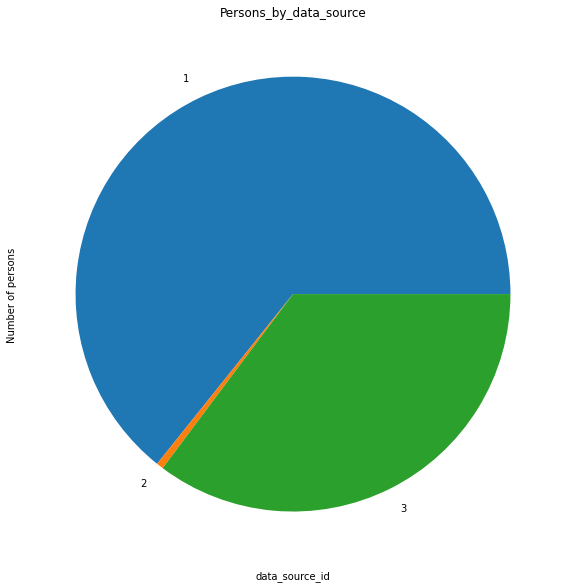

In [12]:
person_names.groupby('data_source_id')['Name'].nunique().plot(kind='pie')
plt.title ("Persons_by_data_source")
plt.xlabel ("data_source_id")
plt.ylabel ("Number of persons")
plt.show()


| data_source_id | Source |
| --- | --- |
| 1 | RAI |
| 2 | QCA |
| 3 | APS |

### Code cell 22  - Person table data ###

In [13]:
person_names

,Name,title,gender_id,birth_year,death_year,data_source_id,notes
0,Arthur William A Beckett,NaN,1.0,1844.0,1909.0,1,"17 King Street, S. James's, S.W. 88 St James's..."
1,Andrew Mercer Adam,NaN,1.0,NaN,NaN,1,"Boston, Lincolnshire"
2,H R Adam,NaN,1.0,NaN,NaN,1,"Old Calabar, W. Africa"
3,William Adam,NaN,1.0,NaN,NaN,1,NaN
4,Henry John Adams,NaN,1.0,NaN,NaN,1,"14 Thornhill Square, N."
...,...,...,...,...,...,...,...
3089,x Wright,Rev Dr,NaN,NaN,NaN,3,NaN
3090,W Wrigley,NaN,NaN,NaN,NaN,3,NaN
3091,James Yates,Rev,NaN,NaN,NaN,3,NaN
3092,John Young,NaN,NaN,NaN,NaN,3,NaN


# 7.8.27 Persons who are members of the new HOD CEDA #

In [14]:
hod

,person_id,Name,birth_year,death_year,Target
0,3386,John Washington,NaN,NaN,HOD
1,3371,Jan Tzatzoe,NaN,NaN,HOD
2,3366,J H Tredgold,NaN,NaN,HOD
3,3359,H B Thorpe,NaN,NaN,HOD
4,3357,Perronet Thompson,NaN,NaN,HOD
...,...,...,...,...,...
149,465,Frederick Cooper,NaN,NaN,HOD
150,403,Henry Christy,"1,810","1,865",HOD
151,81,James (1) Backhouse,"1,794","1,869",HOD
152,28,William (Capt.) Allen,NaN,NaN,HOD


# 7.8.28 Generate gexf file for Gephi visualisation #

### Code cell 24 - Check volume of data for Gephi visualisation graph ###

In [15]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))

# not used this time. 
print("Edges attributes length: ", len(edges_attributes)) 

# This should be the same length as edges

Nodes length:  3094
Edges length:  4046
Edges attributes length:  0


### Code cell 25 - Check the data quality for Gephi visualisation graph ###

In [16]:
# First check that the data is correctly formatted

print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
# not used this time. print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.

First 5 nodes: ['Arthur William A Beckett', 'Andrew Mercer Adam', 'H R Adam', 'William Adam', 'Henry John Adams']
First 5 edges: [('William Adam', 'ESL'), ('William (1) Adams', 'ESL'), ('William (2) Adams', 'ESL'), ('Louis Agassiz', 'ESL'), ('Augustine Aglio', 'ESL')]


### Code cell 26 - NetworkX function ###

In [17]:
# We use NetworkX to build the graph data into a table

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3100
Number of edges: 4021
Average degree:   2.5942


The number of nodes here is 3094 persons plus 6 groups = 3100 (the additional 6 nodes are the CEDA names (CQA, APS, ESL, AI, ASL, and HOD). Gephi will produce a 'bigraph' of the data where relationships are beween individual persons and membership organisations.

### Code cell 27 - Write the gexf file ### 

In [18]:
# Finally we can write a gexf file which will be placed in the root directory.
# We can then open the file in Gephi and visualize the network.

nx.write_gexf(G, 'ceda_laidlaw2.gexf')

# 7.8.29 Visual analysis of the exercise #

# 7.8. 30 The CEDA political network with HOD added #

<img src="laidlaw2.png">

| Society | abv. | Dates | Colour |
| --- | --- | --- | --- |
| Quaker Committee on the Aborigines and the Thomas Hodgkin MD group | QCA | 1832/37 - 1846 | Dark green |
| Aborigines Protection Society | APS | 1837 - 1919 | Purple |
| Ethnological Society of London | ESL | 1843 - 1871 | Blue |
| Anthropological Society of London | ASL | 1863 - 1871 | Light Green |
| Anthropological Institute | AI | 1843 - 1871 | Orange |
| Protecting the Empire's Humanity | HOD | 2021 | dark green |

The Hodgkin network and it's relationships (shown above) are much clearer now that the groups WEL and ZOE have been combined into one. (Both of these former groups were identified by Laidlaw in PEH). The graph is best read 'right' to 'left' following the groups shown in dark green. The Quaker Committee on the Aborigines (QCA), active from 1832 - 1837 (or 1846?) appears top right. This group is 'led' by Thomas Hodgkin MD. Below is the APS formed in 1837 and active to 1919 (beyond the entire period studied in the thesis). We know that Thomas Hodgkin MD formed the APS at Ratcliffe Quaker Meeting House in 1837.

_“Dr Hodgkin moved that an auxiliary society be formed in Ratcliff [ ? Quaker meeting ?] for the purpose of promoting the objects of the Aborigines Protection Society and more especially to collect information from persons recently arrived from abroad and to exert an interest in those who might be going out as colonists or sailors. He observed that though a great amount of valuable information relating to the subjects now under consideration was brought to this part from various parts of the globe very great difficulty had been experienced in collecting it. The formation of the proposed branch society might do much to overcome this difficulty."_ 

(WELLCOME LIBRARY FOR THE HISTORY AND UNDERSTANDING OF MEDICINE, DEPARTMENT OF ARCHIVES AND MANUSCRIPTS. HODGKIN FAMILY PAPERS  1996 PP/HO/D, Thomas Hodgkin MD (1798 1866), General Material on Civilisation and Colonialization. Aborigines Protection Society General Materials.)

PP/HO/D/D148, Minutes of the First Meeting, (3ff), 1837


Thomas Hodgkin's network (HOD) does not centre closely to the QCA, it lies at the heart of the greater network collected and compiled in the HTTD. It links most strongly with the APS, but also has good connectivity with the ESL and later the ASL. It has poor connectivity to the AI. 

#  7.8.31 The CEDA political network with HOD added in detail ###

<img src="thomas_hodgkin_marked.png">

We can see that Hodgkin sits apart, pulled (By the Force Atlas algorithm) to sit between the QCA, the APS and his own personal network (HOD). He is revealled as highly networked and this indicates a possible key influencer. 

The next exercise (Chapter 6) will examine a much greater political activist network suporting and supported by Thomas Hodgkin MD, and one that is not revelaed in it's full extent by this exercise, - Quakers in Britain.

# 7.8.32 Github upload #

We can now update GitHub to pass this exercise and all its resources to the dedicated project repo (see step 1). This enables the entire exercise to be both scrutinised by others and replicated elsewhere (When the exercise is completed and audited, and all copyright issue resolved the repo can be made public). 

# End #